Today is the last day of the ***NumPy*** tutorial. Let's begin!!!!

### ***Advanced indexing and index tricks***
*NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans.*

***Indexing with Arrays of Indices***

In [1]:
import numpy as np
a = np.arange(12)**2  # the first 12 square numbers
print(a)
print()
i = np.array([1, 1, 3, 8, 5])  # an array of indices
print(i)
print()
print(a[i])   # the elements of `a` at the positions i
print()
j = np.array([[3, 4], [9, 7]])  # a bidimensional array of indices
print(j)
print()
print(a[j])  # the same shape as `j`
print()

[  0   1   4   9  16  25  36  49  64  81 100 121]

[1 1 3 8 5]

[ 1  1  9 64 25]

[[3 4]
 [9 7]]

[[ 9 16]
 [81 49]]



*When the indexed array a is multidimensional, a single array of indices refers to the first dimension of a. The following example shows this behavior by converting an image of labels into a color image using a palette.*

In [2]:
palette = np.array([[0, 0, 0],          # black
                     [255, 0, 0],       # red
                     [0, 255, 0],       # green
                     [0, 0, 255],       # blue
                     [255, 255, 255]])  # white
print(palette)
print()
image = np.array([[0, 1, 2, 0],  # each value corresponds to a color in the palette
                   [0, 3, 4, 0]])
print(image)
print()
print(palette[image]) # the (2, 4, 3) color image
print()

[[  0   0   0]
 [255   0   0]
 [  0 255   0]
 [  0   0 255]
 [255 255 255]]

[[0 1 2 0]
 [0 3 4 0]]

[[[  0   0   0]
  [255   0   0]
  [  0 255   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0 255]
  [255 255 255]
  [  0   0   0]]]



*We can also give indexes for more than one dimension. The arrays of indices for each dimension must have the same shape.*

In [3]:
a = np.arange(12).reshape(3, 4)
print(a)
print()
i = np.array([[0, 1],  # indices for the first dim of `a`
              [1, 2]])
print(i)
j = np.array([[2, 1],  # indices for the second dim
               [3, 3]])
print(j)
print()
print(a[i, j])  # i and j must have equal shape
print()
print(a[i, 2])
print()
print(a[:, j])
print()

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[0 1]
 [1 2]]
[[2 1]
 [3 3]]

[[ 2  5]
 [ 7 11]]

[[ 2  6]
 [ 6 10]]

[[[ 2  1]
  [ 3  3]]

 [[ 6  5]
  [ 7  7]]

 [[10  9]
  [11 11]]]



*In Python, arr[i, j] is exactly the same as arr[(i, j)]—so we can put i and j in a tuple and then do the indexing with that.*

In [4]:
l = (i, j) # equivalent to a[i, j]
print(a[l])

[[ 2  5]
 [ 7 11]]


*However, we can not do this by putting i and j into an array, because this array will be interpreted as indexing the first dimension of a.*

In [5]:
s = np.array([i, j]) # not what we want
print(a[s])

IndexError: ignored

In [6]:
a[tuple(s)] # same as `a[i, j]`
print(a[tuple(s)])

[[ 2  5]
 [ 7 11]]


*Another common use of indexing with arrays is the search of the maximum value of time-dependent series:*

In [7]:
time = np.linspace(20, 145, 5)  # time scale
print(time)
print()
data = np.sin(np.arange(20)).reshape(5, 4)  # 4 time-dependent series
print(data)
print()
ind = data.argmax(axis=0) # index of the maxima for each series
print(ind)
print()
time_max = time[ind] # times corresponding to the maxima
print(time_max)
print()
data_max = data[ind, range(data.shape[1])]  # => data[ind[0], 0], data[ind[1], 1]...
print(data_max)
print()
print(np.all(data_max == data.max(axis=0)))

[ 20.    51.25  82.5  113.75 145.  ]

[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]

[2 0 3 1]

[ 82.5   20.   113.75  51.25]

[0.98935825 0.84147098 0.99060736 0.6569866 ]

True


*You can also use indexing with arrays as a target to assign to:*

In [8]:
a = np.arange(5)
print(a)
print()
a[[1, 3, 4]] = 0
print(a)
print()

[0 1 2 3 4]

[0 0 2 0 0]



*However, when the list of indices contains repetitions, the assignment is done several times, leaving behind the last value:*

In [9]:
a = np.arange(5)
a[[0, 0, 2]] = [1, 2, 3]
print(a)

[2 1 3 3 4]


*This is reasonable enough, but watch out if you want to use Python’s += construct, as it may not do what you expect:*

In [10]:
a = np.arange(5)
a[[0, 0, 2]] += 1
print(a)

[1 1 3 3 4]


*Even though 0 occurs twice in the list of indices, the 0th element is only incremented once. This is because Python requires a += 1 to be equivalent to a = a + 1.*

### ***Indexing with Boolean Arrays***
*When we index arrays with arrays of (integer) indices we are providing the list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don’t.*

*The most natural way one can think of for boolean indexing is to use boolean arrays that have the same shape as the original array:*

In [11]:
a = np.arange(12).reshape(3, 4)
b = a > 4
print(b)
print()
print(a[b])  # 1d array with the selected elements

[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]

[ 5  6  7  8  9 10 11]


*This property can be very useful in assignments:*

In [12]:
a[b] = 0  # All elements of `a` higher than 4 become 0
print(a)

[[0 1 2 3]
 [4 0 0 0]
 [0 0 0 0]]


*You can look at the following example to see how to use boolean indexing to generate an image of the Mandelbrot set:*

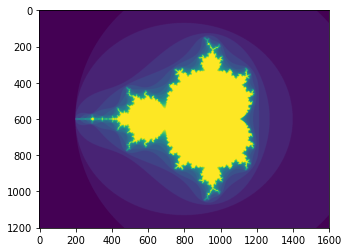

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime
plt.imshow(mandelbrot(400, 400))

*The second way of indexing with booleans is more similar to integer indexing; for each dimension of the array we give a 1D boolean array selecting the slices we want:*

In [14]:
a = np.arange(12).reshape(3, 4)
b1 = np.array([False, True, True])         # first dim selection
b2 = np.array([True, False, True, False])  # second dim selection

In [15]:
print(a[b1, :]) # selecting rows
print()
print(a[b1])    # same thing
print()
print(a[:, b2]) # selecting columns
print()
print(a[b1, b2])# a weird thing to do

[[ 4  5  6  7]
 [ 8  9 10 11]]

[[ 4  5  6  7]
 [ 8  9 10 11]]

[[ 0  2]
 [ 4  6]
 [ 8 10]]

[ 4 10]


*Note that the length of the 1D boolean array must coincide with the length of the dimension (or axis) you want to slice. In the previous example, b1 has length 3 (the number of rows in a), and b2 (of length 4) is suitable to index the 2nd axis (columns) of a.*

### ***The ix_() function***
*The ix_ function can be used to combine different vectors so as to obtain the result for each n-uplet. For example, if you want to compute all the a+b*c for all the triplets taken from each of the vectors a, b and c:*

In [16]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])
ax, bx, cx = np.ix_(a, b, c)

In [17]:
print(ax)
print()
print(bx)
print()
print(cx)
print()
print(ax.shape,bx.shape,cx.shape)

[[[2]]

 [[3]]

 [[4]]

 [[5]]]

[[[8]
  [5]
  [4]]]

[[[5 4 6 8 3]]]

(4, 1, 1) (1, 3, 1) (1, 1, 5)


In [18]:
result = ax + bx * cx
print(result)

[[[42 34 50 66 26]
  [27 22 32 42 17]
  [22 18 26 34 14]]

 [[43 35 51 67 27]
  [28 23 33 43 18]
  [23 19 27 35 15]]

 [[44 36 52 68 28]
  [29 24 34 44 19]
  [24 20 28 36 16]]

 [[45 37 53 69 29]
  [30 25 35 45 20]
  [25 21 29 37 17]]]


In [19]:
result[3, 2, 4]

17

In [20]:
a[3] + b[2] * c[4]

17

In [22]:
result [3,2,4] == a[3] + b[2] * c[4]

True

In [24]:
def ufunc_reduce(ufct, *vectors):
  vs = np.ix_(*vectors)
  r = ufct.identity
  for v in vs:
    r = ufct(r, v)
  return r
# and then use it as:
ufunc_reduce(np.add, a, b, c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

*The advantage of this version of reduce compared to the normal ufunc.reduce is that it makes use of the broadcasting rules in order to avoid creating an argument array the size of the output times the number of vectors.*

### ***“Automatic” Reshaping***
*To change the dimensions of an array, you can omit one of the sizes which will then be deduced automatically:*

In [25]:
a = np.arange(30)
b = a.reshape((2, -1, 3))  # -1 means "whatever is needed"
print(b.shape)
print()
print(b)

(2, 5, 3)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]
  [27 28 29]]]


### ***Vector Stacking***
*How do we construct a 2D array from a list of equally-sized row vectors? In MATLAB this is quite easy: if x and y are two vectors of the same length you only need do m=[x;y]. In NumPy this works via the functions column_stack, dstack, hstack and vstack, depending on the dimension in which the stacking is to be done. For example:*

In [26]:
x = np.arange(0, 10, 2)
y = np.arange(5)
m = np.vstack([x, y])
print(m)
print()
xy = np.hstack([x, y])
print(xy)

[[0 2 4 6 8]
 [0 1 2 3 4]]

[0 2 4 6 8 0 1 2 3 4]


### ***Histograms***
*The NumPy histogram function applied to an array returns a pair of vectors: the histogram of the array and a vector of the bin edges. Beware: matplotlib also has a function to build histograms (called hist, as in Matlab) that differs from the one in NumPy. The main difference is that pylab.hist plots the histogram automatically, while numpy.histogram only generates the data.*

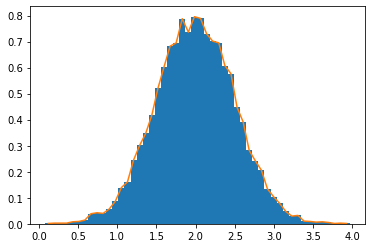

In [27]:
import numpy as np
rg = np.random.default_rng(1)
import matplotlib.pyplot as plt
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = rg.normal(mu, sigma, 10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=True)       # matplotlib version (plot)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)
plt.plot(.5 * (bins[1:] + bins[:-1]), n)

*This is the end of Numpy Tutorial!!!*

*Hope you enjoyed!!!*

*Suggestions and questions are always welcome!!!*